In [1]:
# %matplotlib inline

import numpy as np
import os

from fashionpedia.fp import Fashionpedia
import json
import pandas as pd
from PIL import Image
import ast
import matplotlib.pyplot as plt
import shutil

In [2]:
dataset_path = "/home/cat/projects/CV-stuff/datasets/fashionpedia/"
img_train_root = dataset_path + "train/"
img_val_root = dataset_path + "test/"
crop_img_train_root = dataset_path + "crop_train/"
crop_img_val_root = dataset_path + "crop_test/"

# original names
ann_train_file = "instances_attributes_train2020.json"
ann_val_file = "instances_attributes_val2020.json"
# ann_train_file = "attributes_train2020.json"
# ann_val_file = "attributes_val2020.json"

info_file = "info_test2020.json"

# for commercial use names
ann_com_train = "instances_attributes_commercial_train.csv"
ann_com_val = "instances_attributes_commercial_val.csv"

crop_ann_com_train = "instances_attributes_commercial_train_crop.csv"
crop_ann_com_val = "instances_attributes_commercial_val_crop.csv"
# ann_com_train = "attributes_commercial_train.csv"
# ann_com_val = "attributes_commercial_val.csv"

In [3]:
import json

# Paths
input_json = dataset_path+info_file
output_json = dataset_path+"instances_attributes_commercial_test_filtered.json"

# Allowed licenses and category IDs to remove
allowed_ids = [0, 1, 6, 7, 8, 9, 10]
remove_cat_ids = [13, 14, 15, 16, 17, 18, 20, 21, 22, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

# Load JSON
with open(input_json, "r") as f:
    data = json.load(f)

# 1️⃣ Filter images by allowed licenses
filtered_images = [img for img in data["images"] if img["license"] in allowed_ids]
filtered_image_ids = {img["id"] for img in filtered_images}

# 2️⃣ Filter annotations:
# - Keep only annotations whose image_id is in allowed images
# - Remove annotations whose category_id is in remove_cat_ids
# filtered_annotations = [
#     ann for ann in data["annotations"]
#     if ann["image_id"] in filtered_image_ids and ann["category_id"] not in remove_cat_ids
# ]

# 3️⃣ Optional: remove unused categories
# used_category_ids = {ann["category_id"] for ann in filtered_annotations}
# filtered_categories = [cat for cat in data["categories"] if cat["id"] in used_category_ids]

# Replace with filtered data
data["images"] = filtered_images
# data["annotations"] = filtered_annotations
# data["categories"] = filtered_categories

# Save JSON
with open(output_json, "w") as f:
    json.dump(data, f, indent=2)

# print(f"Filtered JSON saved to {output_json}")


In [4]:
# unlabeled_dit = dataset_path+'unlabeled'
# os.makedirs(unlabeled_dit, exist_ok=True)
# def get_categories(ann_file):
#     import json
#     with open(ann_file, 'r') as f:
#         data = json.load(f)
#     images = data['images']
#     im_list = {img_val_root+cat['file_name'] for cat in images}
#     for filepath in im_list:
#         if os.path.exists(filepath):
#                 shutil.copy2(filepath, unlabeled_dit)
#     return im_list

In [5]:
# cat_dict = get_categories(output_json)
# cat_dict

In [6]:
data.keys()

dict_keys(['info', 'categories', 'attributes', 'licenses', 'images'])

In [9]:
# Load JSON
def load_cat_attr(dataset_path, filename):
    with open(dataset_path+filename, "r") as f:
        data = json.load(f)

    # Convert to DataFrames
    df_attributes = pd.DataFrame(data["attributes"])
    df_categories = pd.DataFrame(data["categories"])
    return df_categories, df_attributes

def convert_json_to_csv(dataset_path, filename, new_filename):
    with open(dataset_path+filename, "r") as f:
        data = json.load(f)

    # Convert to DataFrames
    df_annotations = pd.DataFrame(data["annotations"])
    df_images = pd.DataFrame(data["images"])

    # safe for commercial use: 0, 1, 6, 7, 8, 9, 10
    allowed_ids = [0, 1, 6, 7, 8, 9, 10]
    # keep images only with allowed licences
    df_images_filtered = df_images[df_images['license'].isin(allowed_ids)].copy()
    # print(df_images_filtered.head())

    print(f"Original images: {len(df_images)}")
    print(f"Filtered images: {len(df_images_filtered)}")

    # print(df_annotations.head())
    # merge images with attributes and drop not useful columns
    df_annotations_filtered = df_annotations.merge(
        df_images_filtered,
        left_on='image_id',
        right_on='id',
        how='inner'
    ).drop(columns=['id_x', 'id_y', 'time_captured', 'segmentation', 'area', 'iscrowd', 'original_url', 'isstatic', 'kaggle_id'])
    print(df_annotations_filtered.head())
    # save to a csv file
    # df_annotations_filtered.to_csv(dataset_path+new_filename,index=False)


# uncomment to convert and filter dataset
# convert_json_to_csv(dataset_path, ann_train_file, ann_com_train)
convert_json_to_csv(dataset_path, ann_val_file, ann_com_val)

Original images: 1158
Filtered images: 330
   image_id  category_id                                     attribute_ids  \
0     17039           31                                        [160, 204]   
1     17039           31                                        [160, 204]   
2     17039            9  [229, 295, 136, 137, 80, 145, 115, 85, 311, 317]   
3     17039           25                                                []   
4     17039           27                                                []   

                           bbox  width  height  \
0   [391.0, 460.0, 75.0, 193.0]   1024     682   
1   [583.0, 452.0, 50.0, 228.0]   1024     682   
2  [392.0, 407.0, 241.0, 274.0]   1024     682   
3  [460.0, 389.0, 136.0, 109.0]   1024     682   
4   [442.0, 407.0, 166.0, 51.0]   1024     682   

                              file_name  license  
0  99601fa457d157b81154d089966c2e3a.jpg        7  
1  99601fa457d157b81154d089966c2e3a.jpg        7  
2  99601fa457d157b81154d089966c2e3

In [10]:
# attributes are not categories, but this dataset contains only attributes
df_categories, df_attributes = load_cat_attr(dataset_path, info_file)
df_attributes.head()

,id,name,supercategory,level,taxonomy_id
0,0,classic (t-shirt),nickname,1,att000002_00
1,1,polo (shirt),nickname,1,att000003_00
2,2,undershirt,nickname,1,att000004_00
3,3,henley (shirt),nickname,1,att000005_00
4,4,ringer (t-shirt),nickname,1,att000006_00


In [11]:

# print(df_attributes.head(50))
print(df_attributes.to_string())

      id                                name                                supercategory  level   taxonomy_id
0      0                   classic (t-shirt)                                     nickname      1  att000002_00
1      1                        polo (shirt)                                     nickname      1  att000003_00
2      2                          undershirt                                     nickname      1  att000004_00
3      3                      henley (shirt)                                     nickname      1  att000005_00
4      4                    ringer (t-shirt)                                     nickname      1  att000006_00
5      5                    raglan (t-shirt)                                     nickname      1  att000007_00
6      6                       rugby (shirt)                                     nickname      1  att000008_00
7      7                      sailor (shirt)                                     nickname      1  att000009_00
8

In [12]:
id_to_attr_name = df_attributes.set_index('id')['name'].to_dict()
id_to_cat_name = df_categories.set_index('id')['name'].to_dict()

In [13]:
# ['glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'leg warmer', 
# 'tights, stockings', 'sock', 'umbrella', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon',
#  'rivet', 'ruffle', 'sequin', 'tassel']

def filter_categories(df):
    remove_cat_ids = [13, 14, 15, 16, 17, 18, 20, 21, 22, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
    return df[~df["category_id"].isin(remove_cat_ids)].copy()

In [14]:
# Count the frequency of each category
def plot_counts(df):
    category_counts = df["category_id"].value_counts()

    # Map IDs → names
    category_counts.index = category_counts.index.map(id_to_cat_name)
    # Plot
    plt.figure(figsize=(12,6))
    category_counts.plot(kind="bar")

    plt.title("Distribution of Categories")
    plt.xlabel("Category ID")
    plt.ylabel("Number of Annotations")
    plt.show()

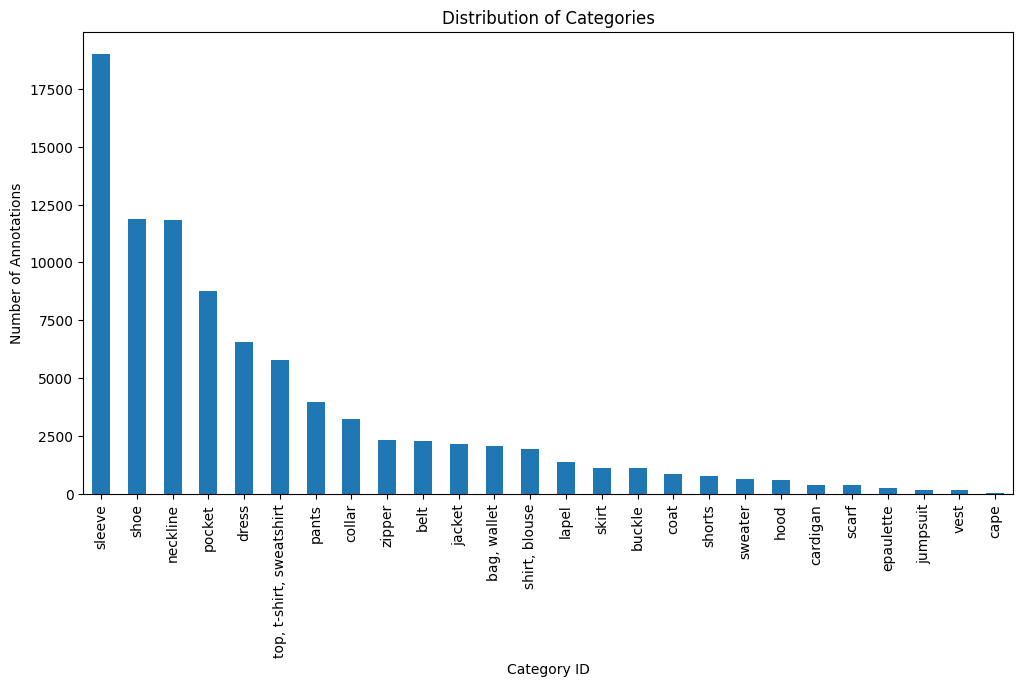

In [15]:
def filter_and_save(dataset_path, ann_com_train, new_filename):
    df_train = pd.read_csv(dataset_path+ann_com_train)
    df_train = filter_categories(df_train)
    plot_counts(df_train)
    # df_train.to_csv(dataset_path+new_filename,index=False)

filter_and_save(dataset_path, ann_com_train, "instances_attributes_commercial_train_filtered.csv")
# filter_and_save(dataset_path, ann_com_val, "instances_attributes_commercial_val_filtered.csv")

In [75]:
def show_images(
    df, img_root, N=5, filter_category=5, required_attr=None,
    fixed_height=324, secondary_required=None
):
    import ast
    from PIL import Image
    from IPython.display import display

    # --- Step 1: filter by main category
    if required_attr is not None:
        def has_required_attr(attr_str):
            try:
                parsed = ast.literal_eval(attr_str) if isinstance(attr_str, str) else attr_str
                if isinstance(parsed, list):
                    return required_attr in parsed
                return parsed == required_attr
            except Exception:
                return False

        mask = (df["category_id"] == filter_category) & df["attribute_ids"].apply(has_required_attr)
    else:
        mask = (df["category_id"] == filter_category)

    img_ids_with_cat = set(df.loc[mask, "image_id"].unique())

    # --- Step 2: apply secondary filters (presence or attributes)
    if secondary_required:
        # normalize input → support {27} or {33:[180]}
        if isinstance(secondary_required, (list, set)):
            secondary_required = {cat_id: None for cat_id in secondary_required}
        elif isinstance(secondary_required, int):
            secondary_required = {secondary_required: None}

        for sec_cat, req_attrs in secondary_required.items():
            if req_attrs is None:
                # ✅ just require presence of this category
                sec_mask = (df["category_id"] == sec_cat)
            else:
                if not isinstance(req_attrs, (list, tuple, set)):
                    req_attrs = [req_attrs]

                def has_req_attrs(attr_str):
                    try:
                        parsed = ast.literal_eval(attr_str) if isinstance(attr_str, str) else attr_str
                        if isinstance(parsed, list):
                            return any(a in parsed for a in req_attrs)
                        return parsed in req_attrs
                    except Exception:
                        return False

                sec_mask = (df["category_id"] == sec_cat) & df["attribute_ids"].apply(has_req_attrs)

            sec_ids = set(df.loc[sec_mask, "image_id"].unique())
            img_ids_with_cat &= sec_ids  # 🔥 intersect

    # --- Step 3: filter dataframe to valid images
    filtered_df = df[df["image_id"].isin(img_ids_with_cat)]
    print(f"Found {len(img_ids_with_cat)} images with category {filter_category}"
          + (f" and attribute {required_attr}" if required_attr is not None else "")
          + (f" and secondary filters {secondary_required}" if secondary_required else ""))

    # --- Step 4: show first N
    image_groups = filtered_df.groupby("image_id")
    firstN = list(image_groups)[:N]
    for image_id, group in firstN:
        print(f"\nImage ID: {image_id}")
        img_path = group['file_name'].iloc[0]
        img = Image.open(img_root + img_path)
        height_percent = (fixed_height / float(img.size[1]))
        width_size = int((float(img.size[0]) * float(height_percent)))
        img = img.resize((width_size, fixed_height), Image.NEAREST)
        display(img)

        cat_grouped = group.groupby("category_id")["attribute_ids"].apply(list)
        for category_id, attrs in cat_grouped.items():
            cat_name = id_to_cat_name.get(category_id, f"Unknown({category_id})")
            all_attr_ids = []
            for a in attrs:
                try:
                    parsed = ast.literal_eval(a) if isinstance(a, str) else a
                    if isinstance(parsed, list):
                        all_attr_ids.extend(parsed)
                    else:
                        all_attr_ids.append(parsed)
                except Exception:
                    all_attr_ids.append(a)

            attr_names = [id_to_attr_name.get(i, f"Unknown({i})") for i in all_attr_ids]
            print(f"  Category {cat_name}: Attributes {attr_names}")


In [17]:
df_attr = pd.read_csv(dataset_path+ann_com_train)
# df_attr.to_json(dataset_path+"attributes_commercial_train.json", orient='records', lines=True)
df_attr.head()

,image_id,category_id,attribute_ids,bbox,width,height,file_name,license
0,15157,10,"[128, 325, 102, 295, 301, 142, 115, 316, 317]","[254.0, 565.0, 219.0, 458.0]",683,1024,3edf2409090fd7ee1717fb99b82b9f02.jpg,7
1,15157,13,[],"[334.0, 388.0, 43.0, 41.0]",683,1024,3edf2409090fd7ee1717fb99b82b9f02.jpg,7
2,15157,19,[],"[230.0, 852.0, 172.0, 113.0]",683,1024,3edf2409090fd7ee1717fb99b82b9f02.jpg,7
3,15157,24,[],"[309.0, 591.0, 178.0, 432.0]",683,1024,3edf2409090fd7ee1717fb99b82b9f02.jpg,7
4,15157,33,"[200, 179]","[332.0, 565.0, 117.0, 64.0]",683,1024,3edf2409090fd7ee1717fb99b82b9f02.jpg,7


Found 76 images with category 10 and attribute 100

Image ID: 702


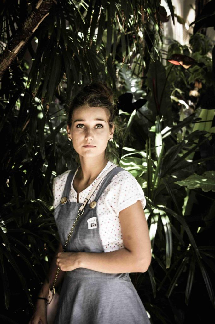

  Category top, t-shirt, sweatshirt: Attributes ['above-the-hip (length)', 'no special manufacturing technique', 'normal waist', 'no non-textile material', 'regular (fit)', 'classic (t-shirt)', 'symmetrical', 'dot']
  Category dress: Attributes ['no special manufacturing technique', 'plain (pattern)', 'a-line', 'no non-textile material', 'jumper (dress)', 'symmetrical', 'zip-up', 'high waist']
  Category bag, wallet: Attributes []
  Category sleeve: Attributes ['short (length)', 'cap (sleeve)']
  Category neckline: Attributes ['collarless']

Image ID: 725


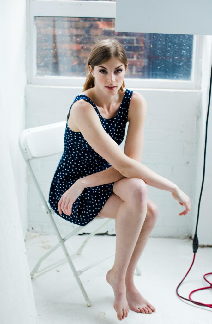

  Category dress: Attributes ['no special manufacturing technique', 'normal waist', 'zip-up', 'no non-textile material', 'jumper (dress)', 'mini (length)', 'symmetrical', 'dot', 'straight']
  Category neckline: Attributes ['u-neck']

Image ID: 900


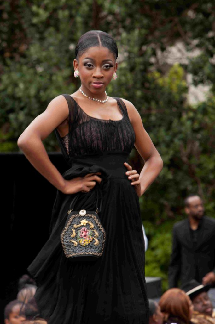

  Category dress: Attributes ['plain (pattern)', 'applique(a)', 'a-line', 'no non-textile material', 'jumper (dress)', 'symmetrical', 'zip-up', 'high waist']
  Category bag, wallet: Attributes []
  Category neckline: Attributes ['square (neckline)']

Image ID: 981


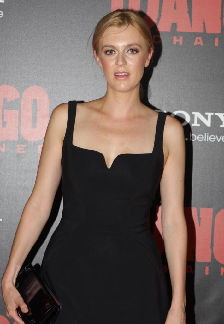

  Category dress: Attributes ['no special manufacturing technique', 'plain (pattern)', 'a-line', 'no non-textile material', 'jumper (dress)', 'symmetrical', 'zip-up', 'high waist']
  Category bag, wallet: Attributes []
  Category neckline: Attributes []

Image ID: 1154


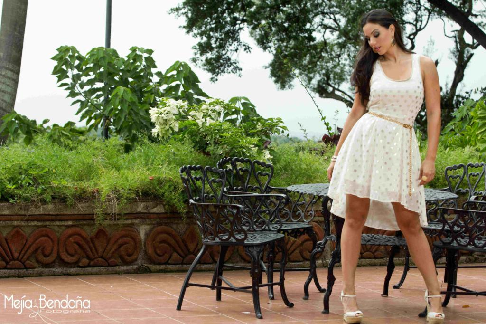

  Category dress: Attributes ['no special manufacturing technique', 'circle', 'zip-up', 'no non-textile material', 'jumper (dress)', 'knee (length)', 'symmetrical', 'dot', 'high waist']
  Category belt: Attributes []
  Category shoe: Attributes []
  Category neckline: Attributes ['square (neckline)']

Image ID: 1613


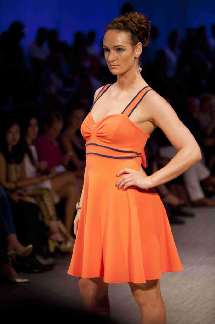

  Category dress: Attributes ['plain (pattern)', 'circle', 'no non-textile material', 'jumper (dress)', 'knee (length)', 'symmetrical', 'zip-up', 'ruched', 'high waist']
  Category belt: Attributes []
  Category neckline: Attributes ['sweetheart (neckline)']

Image ID: 1638


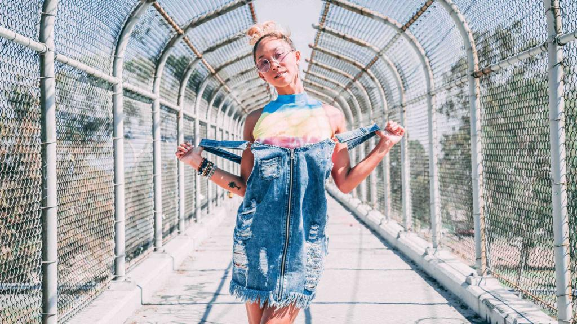

  Category top, t-shirt, sweatshirt: Attributes ['no special manufacturing technique', 'plain (pattern)', 'no non-textile material', 'tight (fit)', 'halter (top)', 'symmetrical', 'high waist']
  Category dress: Attributes ['plain (pattern)', 'normal waist', 'no non-textile material', 'frayed', 'jumper (dress)', 'mini (length)', 'symmetrical', 'zip-up', 'straight']
  Category glasses: Attributes []
  Category pocket: Attributes ['flap (pocket)']
  Category neckline: Attributes ['high (neck)']
  Category zipper: Attributes []
  Category rivet: Attributes []

Image ID: 2420


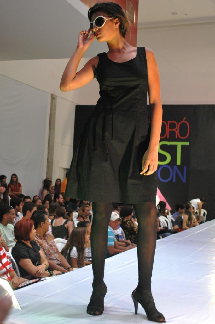

  Category dress: Attributes ['no special manufacturing technique', 'plain (pattern)', 'a-line', 'no non-textile material', 'above-the-knee (length)', 'jumper (dress)', 'symmetrical', 'zip-up', 'high waist']
  Category glasses: Attributes []
  Category tights, stockings: Attributes []
  Category shoe: Attributes []
  Category neckline: Attributes ['oval (neck)']

Image ID: 4418


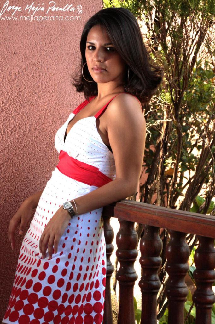

  Category dress: Attributes ['no special manufacturing technique', 'a-line', 'no non-textile material', 'dot', 'jumper (dress)', 'symmetrical', 'zip-up', 'high waist']
  Category watch: Attributes []
  Category belt: Attributes []
  Category neckline: Attributes ['queen anne (neck)']

Image ID: 4496


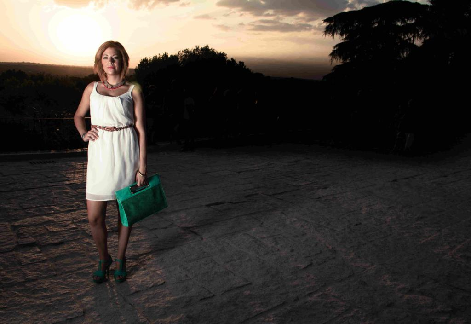

  Category dress: Attributes ['no special manufacturing technique', 'plain (pattern)', 'a-line', 'no non-textile material', 'jumper (dress)', 'mini (length)', 'symmetrical', 'zip-up', 'high waist']
  Category watch: Attributes []
  Category belt: Attributes []
  Category shoe: Attributes []
  Category bag, wallet: Attributes []
  Category neckline: Attributes ['oval (neck)']


In [244]:
# tie = df[df["category_id"] == 44]
# show_images(df_attr, img_train_root, 10, 2)
show_images(
    df_attr, 
    img_train_root, 
    N=10,
    filter_category=10,              
    required_attr=100,
    # secondary_required={10: 152}
)

In [19]:
# from tensorflow.lite.python import interpreter as interpreter_wrapper
# model_path = "/home/cat/projects/CV-stuff/latl/classification/notebooks/saved_model/yolo_x_nano_float32.tflite"
# model = interpreter_wrapper.Interpreter(model_path=model_path)
# model.allocate_tensors()

In [20]:
# import cv2
# import numpy as np

# def letterbox_image(image, max_size=640, color=(114, 114, 114)):
#     h, w = image.shape[:2]
#     scale = max_size / max(h, w)
#     new_w, new_h = int(w * scale), int(h * scale)
    
#     # Resize while keeping aspect ratio
#     resized_image = cv2.resize(image, (new_w, new_h))
    
#     # Create padded image
#     padded_image = np.full((max_size, max_size, 3), color, dtype=np.uint8)
    
#     # Compute top-left corner for placing resized image
#     top = (max_size - new_h) // 2
#     left = (max_size - new_w) // 2
    
#     padded_image[top:top+new_h, left:left+new_w] = resized_image
#     return padded_image, scale, left, top

In [21]:
# from super_gradients.training.utils.media.image import load_image
# url = "https://github.com/KMnP/fashionpedia-api/blob/1ef732050e15d446c38d58ef945ccadc28c59328/data/demo/input.jpg?raw=true"
# image = load_image(url)
# print("loaded image ",image.shape)
# # display(Image.fromarray(image))
# image, _,_,_ = letterbox_image(image, max_size=640)
# print("letter image ",image.shape)

# # display(Image.fromarray(image))
# image_bchw = np.expand_dims(image, 0)
# print("letter image ",image_bchw.shape) 


In [22]:
# input_details = model.get_input_details()
# output_details = model.get_output_details()

# print("Input details:", input_details)
# print("Output details:", output_details)

In [23]:
# # Set tensor
# model.set_tensor(input_details[0]['index'], image_bchw)

# # Run inference
# model.invoke()

# # Get output
# num_detections = int(model.get_tensor(output_details[0]['index'])[0])
# boxes = model.get_tensor(output_details[1]['index'])[0]  # (1000, 4)
# scores = model.get_tensor(output_details[2]['index'])[0]  # (1000,)
# classes = model.get_tensor(output_details[3]['index'])[0]  # (1000,)

# # Keep only valid detections
# boxes = boxes[:num_detections]
# scores = scores[:num_detections]
# classes = classes[:num_detections]

# # Example: convert first box to pixel coordinates
# h, w = image.shape[:2]  # your image size
# ymin, xmin, ymax, xmax = boxes[0]
# xmin, xmax = int(xmin * w), int(xmax * w)
# ymin, ymax = int(ymin * h), int(ymax * h)

# for i in range(num_detections):
#     print(f"Class: {classes[i]}, Score: {scores[i]:.2f}, Box: {(boxes[i])}")
